In [2]:
import matplotlib
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, yt
from Convenience import *
from time import time


tabulate results of Deff for faster performance in fit (doesn't work yet and isn't really needed)

Text(0,0.5,u'$D_{eff} = D_L D_{LS} / D_S$ / Gpc')

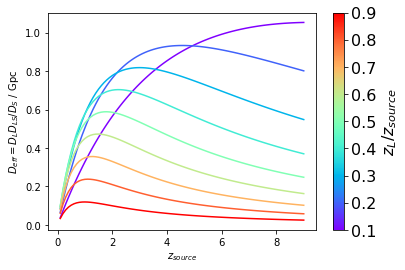

In [3]:
z_s = np.arange(0.1,9.1,0.1)
es = np.arange(0.1,1.0,0.1)
for e, color in zip(es, rainbow(np.linspace(0,1,es.size))):
    z_L = e*z_s
    d = Deff( z_L=z_L, z_s=z_s )
    plt.plot(z_s,d, label=r"$\epsilon$ = %.1f " % e, color=color )
Colorbar(es, label=r"$z_L/z_{source}$")
plt.xlabel(r"$z_{source}$")
plt.ylabel(r"$D_{eff} = D_L D_{LS} / D_S$ / Gpc")

Text(0,0.5,u'$D_{\\rm eff} = D_L D_{LS} / D_S$')

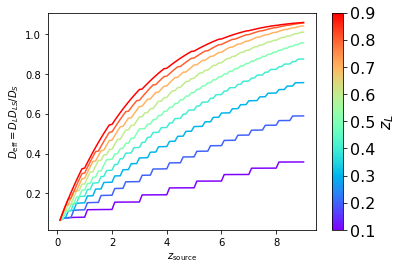

In [281]:
z_s = np.arange(0.1,9.1,0.1)
es = np.arange(0.1,1.0,0.1)
for e, color in zip(es, rainbow(np.linspace(0,1,es.size))):
    z_L = e*z_s
    d = Deff_( z_L=z_L, z_s=z_s )
    plt.plot(z_s,d, label=r"$\epsilon$ = %.1f " % e, color=color )
Colorbar(es, label=r"$z_L$")
plt.xlabel(r"$z_{\rm source}$")
plt.ylabel(r"$D_{\rm eff} = D_L D_{LS} / D_S$ / Gpc")

In [291]:


zs = np.arange(0.1,7.1,0.1)
zL = np.arange(0.0,7.1,0.1)

'''  we table Deff for faster use with IGM and intervening galaxies
deff = np.zeros([z_s.size,z_L.size])
for i_s, zs in enumerate(z_s):
    deff[i_s] = Deff( zs, z_L )

np.save( 'Deff.npy', deff)
#deff = np.load( 'Deff.npy' )
#'''

deff = np.load( 'Deff.npy' )
def Deff_( z_s=np.array(1.0), z_L=np.array(0.5) ):
    i_s = np.searchsorted( zs, z_s )
    i_L = np.searchsorted( zL, z_L )
    return deff[i_s,i_L]

    


In [7]:
norm?

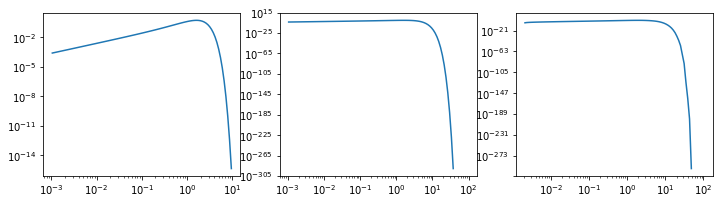

In [4]:
from scipy.stats import norm
norm1 = norm( loc=1., scale=1.)
norm2 = norm( loc=2., scale=1.)
N=100
x1 = 10.**np.linspace(-3,1,N+1)
x1_ = x1[:-1] + np.diff(x1)/2
P1 = norm1.pdf(x1_)
x2 = 10.**np.linspace(-3,2,N+1)
x2_ = x2[:-1] + np.diff(x2)/2
P2 = norm1.pdf(x2_)

fig, axs = plt.subplots(1,3,figsize=(12,3))

PlotLikelihood(x1,P1,ax=axs[0])
PlotLikelihood(x2,P2,ax=axs[1])

P, x = LikelihoodsConvolve( [P1,P2], [x1,x2] )
PlotLikelihood(x,P,ax=axs[2])


4.89269913616e-17 0.0


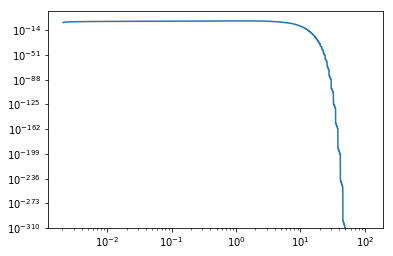

In [13]:
plt.loglog( x[:-1]+np.diff(x)/2, P )
print P1.min(), P2.min()

In [5]:
xs = [np.array([    10.        ,     10.71519305,     11.48153621,     12.30268771,
           13.18256739,     14.12537545,     15.13561248,     16.21810097,
           17.37800829,     18.62087137,     19.95262315,     21.3796209 ,
           22.90867653,     24.54708916,     26.30267992,     28.18382931,
           30.1995172 ,     32.35936569,     34.67368505,     37.15352291,
           39.81071706,     42.65795188,     45.70881896,     48.97788194,
           52.48074602,     56.23413252,     60.25595861,     64.5654229 ,
           69.18309709,     74.13102413,     79.43282347,     85.11380382,
           91.20108394,     97.7237221 ,    104.71285481,    112.20184543,
          120.22644346,    128.82495517,    138.03842646,    147.91083882,
          158.48931925,    169.82436525,    181.97008586,    194.98445998,
          208.92961309,    223.87211386,    239.8832919 ,    257.03957828,
          275.42287033,    295.12092267,    316.22776602,    338.84415614,
          363.07805477,    389.04514499,    416.86938347,    446.68359215,
          478.63009232,    512.86138399,    549.54087386,    588.84365536,
          630.95734448,    676.08297539,    724.43596007,    776.24711663,
          831.7637711 ,    891.25093813,    954.99258602,   1023.29299228,
         1096.47819614,   1174.89755494,   1258.92541179,   1348.96288259,
         1445.43977075,   1548.81661891,   1659.58690744,   1778.27941004,
         1905.46071796,   2041.73794467,   2187.76162395,   2344.22881532,
         2511.88643151,   2691.53480393,   2884.03150313,   3090.29543251,
         3311.31121483,   3548.13389234,   3801.89396321,   4073.80277804,
         4365.1583224 ,   4677.35141287,   5011.87233627,   5370.3179637 ,
         5754.39937337,   6165.95001861,   6606.93448008,   7079.45784384,
         7585.77575029,   8128.30516164,   8709.63589956,   9332.54300797,
        10000.        ]), np.array([ 143.59334136,  144.21947325,  144.84833535,  145.47993957,
        146.11429788,  146.75142227,  147.39132482,  148.03401762,
        148.67951286,  149.32782276,  149.97895957,  150.63293564,
        151.28976333,  151.9494551 ,  152.61202341,  153.27748083,
        153.94583994,  154.6171134 ,  155.29131391,  155.96845424,
        156.64854721,  157.3316057 ,  158.01764262,  158.70667098,
        159.39870382,  160.09375423,  160.79183537,  161.49296046,
        162.19714278,  162.90439565,  163.61473246,  164.32816666,
        165.04471175,  165.76438131,  166.48718895,  167.21314836,
        167.94227328,  168.67457751,  169.41007493,  170.14877944,
        170.89070504,  171.63586577,  172.38427574,  173.13594911,
        173.89090012,  174.64914306,  175.41069228,  176.17556219,
        176.94376729,  177.71532211,  178.49024125,  179.2685394 ,
        180.05023127,  180.83533168,  181.62385548,  182.41581759,
        183.21123303,  184.01011683,  184.81248412,  185.61835011,
        186.42773003,  187.24063921,  188.05709304,  188.87710699,
        189.70069656,  190.52787736,  191.35866504,  192.19307532,
        193.03112402,  193.87282699,  194.71820016,  195.56725954,
        196.4200212 ,  197.27650129,  198.13671602,  199.00068168,
        199.86841461,  200.73993126,  201.61524811,  202.49438173,
        203.37734878,  204.26416597,  205.15485007,  206.04941797,
        206.94788658,  207.85027292,  208.75659408,  209.6668672 ,
        210.58110953,  211.49933836,  212.42157109,  213.34782518,
        214.27811814,  215.21246761,  216.15089126,  217.09340686,
        218.04003226,  218.99078537,  219.9456842 ,  220.90474682,
        221.86799138]), np.array([  1.00657500e-03,   1.20458723e-03,   1.44155217e-03,
         1.72513258e-03,   2.06449858e-03,   2.47062425e-03,
         2.95664247e-03,   3.53826961e-03,   4.23431374e-03,
         5.06728284e-03,   6.06411260e-03,   7.25703752e-03,
         8.68463319e-03,   1.03930638e-02,   1.24375747e-02,
         1.48842794e-02,   1.78122969e-02,   2.13163105e-02,
         2.55096294e-02,   3.05278529e-02,   3.65332554e-02,
         4.37200333e-02,   5.23205855e-02,   6.26130280e-02,
         7.49301874e-02,   8.96703635e-02,   1.07310209e-01,
         1.28420144e-01,   1.53682800e-01,   1.83915095e-01,
         2.20094651e-01,   2.63391405e-01,   3.15205445e-01,
         3.77212280e-01,   4.51417025e-01,   5.40219237e-01,
         6.46490514e-01,   7.73667349e-01,   9.25862257e-01,
         1.10799676e+00,   1.32596055e+00,   1.58680191e+00,
         1.89895567e+00,   2.27251594e+00,   2.71956253e+00,
         3.25455160e+00,   3.89478306e+00,   4.66096009e+00,
         5.57785853e+00,   6.67512814e+00,   7.98825130e+00,
         9.55969046e+00,   1.14402612e+01,   1.36907756e+01,
         1.63840085e+01,   1.96070509e+01,   2.34641263e+01,
         2.80799609e+01,   3.36038170e+01,   4.02143194e+01,
         4.81252318e+01,   5.75923693e+01,   6.89218708e+01,
         8.24800981e+01,   9.87054835e+01,   1.18122707e+02,
         1.41359664e+02,   1.69167766e+02,   2.02446245e+02,
         2.42271226e+02,   2.89930530e+02,   3.46965314e+02,
         4.15219912e+02,   4.96901473e+02,   5.94651331e+02,
         7.11630424e+02,   8.51621503e+02,   1.01915146e+03,
         1.21963770e+03,   1.45956336e+03,   1.74668691e+03,
         2.09029305e+03,   2.50149298e+03,   2.99358366e+03,
         3.58247783e+03,   4.28721854e+03,   5.13059501e+03,
         6.13987947e+03,   7.34770915e+03,   8.79314164e+03,
         1.05229179e+04,   1.25929736e+04,   1.50702481e+04,
         1.80348492e+04,   2.15826430e+04,   2.58283545e+04,
         3.09092772e+04,   3.69897129e+04,   4.42662847e+04,
         5.29742948e+04,   6.33953342e+04])]
Ps = [np.array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.00087588e-05,   1.58699552e-04,   7.05686480e-04,
         2.13836839e-03,   5.45576516e-03,   9.98494991e-03,
         1.53854341e-02,   1.94530842e-02,   2.05894961e-02,
         1.91615169e-02,   1.73210745e-02,   1.34372753e-02,
         1.03746443e-02,   7.62431034e-03,   5.79577804e-03,
         4.04250441e-03,   3.18641142e-03,   2.21947993e-03,
         1.58956531e-03,   1.12000538e-03,   9.22131467e-04,
         6.26091834e-04,   5.47100091e-04,   3.43112120e-04,
         2.72560436e-04,   1.74322262e-04,   1.34465787e-04,
         1.08448817e-04,   9.39810158e-05,   5.39742690e-05,
         5.03717187e-05,   4.70096231e-05,   3.18071514e-05,
         2.04718351e-05,   1.71948853e-05,   1.06981338e-05,
         1.24800992e-05,   9.31768500e-06,   5.07253226e-06,
         2.02884109e-06,   1.89342468e-06,   2.94507787e-06,
         2.74850659e-06,   1.02602224e-06,   4.78769833e-07,
         1.34044202e-06,   0.00000000e+00,   3.89158731e-07,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00]), np.array([  3.19421523e-05,   0.00000000e+00,   3.16653993e-05,
         1.57639617e-05,   1.56955221e-05,   0.00000000e+00,
         3.11190661e-05,   1.54919810e-05,   1.54247222e-05,
         4.60732665e-05,   7.64553974e-05,   1.82696315e-04,
         1.97061730e-04,   1.81113399e-04,   2.70490637e-04,
         4.18936461e-04,   3.12838229e-04,   4.89468627e-04,
         8.12239315e-04,   7.49897473e-04,   8.93042126e-04,
         1.31188273e-03,   1.55291141e-03,   1.86407340e-03,
         2.17250430e-03,   3.16582108e-03,   3.62274867e-03,
         3.73482824e-03,   4.52454863e-03,   4.92724007e-03,
         6.11128538e-03,   7.31286841e-03,   8.23989280e-03,
         9.40775887e-03,   1.15708949e-02,   1.25630050e-02,
         1.42563698e-02,   1.67913575e-02,   1.83970718e-02,
         2.05141864e-02,   2.21697136e-02,   2.40109041e-02,
         2.58356897e-02,   2.94588652e-02,   3.18763273e-02,
         3.44166855e-02,   3.50909343e-02,   3.69692939e-02,
         3.85455438e-02,   4.06364976e-02,   4.22717185e-02,
         4.31116161e-02,   4.35230956e-02,   4.32834115e-02,
         4.41940330e-02,   4.25815224e-02,   4.26219682e-02,
         4.25241659e-02,   4.11979173e-02,   3.85480282e-02,
         3.79993247e-02,   3.57154303e-02,   3.40969812e-02,
         3.05249129e-02,   2.88570529e-02,   2.65290405e-02,
         2.42566520e-02,   2.17051827e-02,   1.97694444e-02,
         1.63004936e-02,   1.50048398e-02,   1.27820005e-02,
         1.08467203e-02,   1.01370038e-02,   8.49570808e-03,
         7.21420121e-03,   5.72565083e-03,   4.82111135e-03,
         3.67407172e-03,   2.98991905e-03,   2.41312419e-03,
         1.85250864e-03,   1.30789402e-03,   1.02396454e-03,
         9.08701696e-04,   6.84084220e-04,   4.06471409e-04,
         2.62512457e-04,   3.26715943e-04,   2.60237999e-04,
         1.18757911e-04,   7.52451135e-05,   5.35131681e-05,
         6.39370074e-05,   6.36594236e-05,   1.05638408e-05,
         0.00000000e+00,   1.04723136e-05,   0.00000000e+00,
         2.07631590e-05]), np.array([  2.02007734e-03,   1.09720870e-02,   2.99738623e-02,
         7.30774444e-02,   1.49214897e-01,   2.84557232e-01,
         5.13215390e-01,   8.31125462e-01,   1.18611844e+00,
         1.62535274e+00,   2.09921007e+00,   2.53342040e+00,
         2.94141307e+00,   3.25794290e+00,   3.47598138e+00,
         3.56992402e+00,   3.57039142e+00,   3.47507556e+00,
         3.30246349e+00,   3.06157668e+00,   2.79877856e+00,
         2.52347750e+00,   2.22546786e+00,   1.95354296e+00,
         1.69251031e+00,   1.44903194e+00,   1.23499670e+00,
         1.04775603e+00,   8.81772287e-01,   7.38903490e-01,
         6.16143183e-01,   5.13548069e-01,   4.26877134e-01,
         3.55401802e-01,   2.93667232e-01,   2.43445837e-01,
         2.02428376e-01,   1.68293410e-01,   1.40151367e-01,
         1.16759762e-01,   9.75037086e-02,   8.13701560e-02,
         6.78313570e-02,   5.66826820e-02,   4.70777849e-02,
         3.91673971e-02,   3.22460726e-02,   2.62746655e-02,
         2.09479966e-02,   1.65583859e-02,   1.27971228e-02,
         9.83355703e-03,   7.43385603e-03,   5.52206241e-03,
         4.09256174e-03,   2.98594110e-03,   2.13673166e-03,
         1.50983297e-03,   1.04261365e-03,   7.12256654e-04,
         4.83461867e-04,   3.22511985e-04,   2.13331724e-04,
         1.41445022e-04,   8.92970091e-05,   5.96764899e-05,
         3.75322263e-05,   2.47637520e-05,   1.56560024e-05,
         1.00735841e-05,   6.45044958e-06,   3.85761556e-06,
         2.37140426e-06,   1.53350606e-06,   8.96741439e-07,
         5.45034731e-07,   3.59935630e-07,   2.31936110e-07,
         1.32957851e-07,   7.52289403e-08,   5.15124669e-08,
         2.84533124e-08,   1.95085994e-08,   1.10376369e-08,
         6.66911941e-09,   5.57283753e-09,   4.16136397e-09,
         2.81496642e-09,   1.31448547e-09,   8.09353247e-10,
         7.24618179e-10,   1.21100827e-10,   1.68656758e-10,
         1.40932656e-10,   7.06595350e-11,   3.93629288e-11,
         0.00000000e+00,   1.37427354e-11,   0.00000000e+00,
         9.59597179e-12])]


In [6]:
t0=time()
P, x = LikelihoodsConvolve( Ps[::2], xs[::2] )
print "this took %.1f minutes" % ( (time()-t0)/60 )
print P.size, x.size
P, x = LikelihoodsConvolve( [P,Ps[1]], [x,xs[1]] )
print "this took %.1f minutes" % ( (time()-t0)/60 )

100
this took 0.0 minutes
100 101
100
this took 0.0 minutes


In [7]:
from time import time
t0=time()
P, x = LikelihoodsConvolve( Ps, xs )
print "this took %.1f minutes" % ( (time()-t0)/60 )

100
100
this took 0.0 minutes


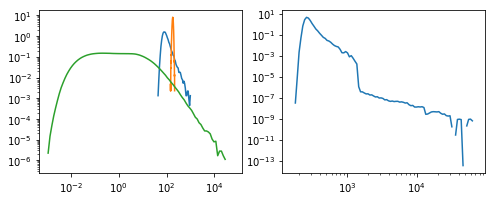

In [8]:
fig, axs = plt.subplots( 1, 2, figsize=(8,3))
for xx, PP in zip( xs, Ps):
    PlotLikelihood( xx, PP, ax=axs[0] )    
PlotLikelihood( x, P, ax=axs[1] )

Here, we translate the likelihood of SM in the IGM, $P(SM_{IGM}|z_s)$, to likelihood of scattering time in the IGM, $P(\tau(SM_{IGM},z_s)|z_s)$.

In [13]:
from scipy.optimize import fmin_slsqp as  fmin

def Deff_max( z_s, accuracy=1e-2 ):
    ### returns optimal redshift and Deff for lense between observer and source at redshift z_s
    Deff_min = lambda z_L : -Deff( z_s=z_s, z_L=z_L )
    ### find z_L that maximizes D_eff(z_s,z_L) for given z_s
    z_L, = fmin( Deff_min, z_s/2, iprint=0, acc=accuracy)
    return z_L, Deff( z_s=z_s, z_L=z_L )
t0 = time()
print Deff_max( 1.8 ), "in %.3f s" % ( time()-t0 )

(0.46024824326319758, 0.75566323825229009) in 0.211 s


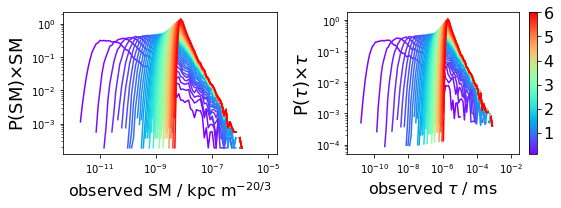

In [13]:
model = 'primordial'  ## other models only differ in RM
fig, axs = plt.subplots( 1, 2, figsize=(8,3))
for z_s, color in zip(redshift_bins, rainbow( np.linspace(0,1,len(redshift_bins)))):
    ### read P(SM_IGM|z_s)
    P, x = GetLikelihood_IGM( redshift=z_s, model=model, nside=4, measure='SM', absolute=False)
    PlotLikelihood( x, P, measure='SM', color=color, ax=axs[0] )
    ### translate x-axis
    z_L, D_eff = Deff_max( z_s )
    x_tau = ScatteringTime( SM=x, redshift=z_L, D_eff=D_eff)
    ### renormalize
    P /= np.sum(P*np.diff(x_tau))
    PlotLikelihood( x_tau, P, measure='tau', color=color, ax=axs[1] )
    Write2h5( filename=likelihood_file_IGM, datas=[P,x_tau], 
              keys=[ KeyIGM( redshift=z_s, model=model, nside=4, measure='tau', axis=axis) for axis in ['P','x'] ] 
            )

Colorbar(redshift_bins)
plt.tight_layout()
plt.show()


Here, we translate the likelihood of SM from galaxies intervening LoS at $z_L$, $P(SM_{Inter}|z_L)$, to likelihood of scattering time for source at $z_s$, $P(\tau(SM_{Inter},z_s)|z_s)$.

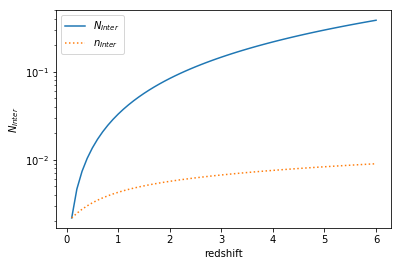

In [10]:
### plot likelihood for galaxies at redshift to intersect LoS, n_inter,
### as well as expectet number of galaxies in LoS to source, N_inter
n_inter = nInter( redshift_bins[-1], r=0.01/hubble_constant, n=0.02*hubble_constant**3 )
N_inter = np.cumsum( n_inter )

plt.plot( redshift_bins, N_inter, label=r"$N_{Inter}$" )
plt.plot( redshift_bins, n_inter, linestyle=':', label=r"$n_{Inter}$" )
plt.xlabel('redshift')
plt.ylabel(r"$N_{Inter}$")
plt.yscale( 'log')
plt.legend()

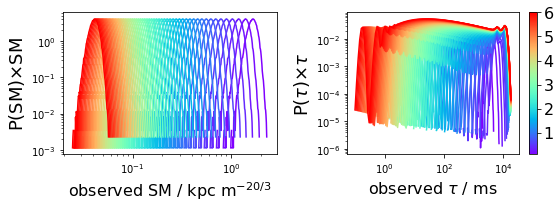

In [12]:
model = 'Rodrigues18/smd'
n = 0.02*hubble_constant**3   ### choose n(z) according to merger tree !!!
r = 0.01/hubble_constant      ### choose r(z) ???
fig, axs = plt.subplots( 1, 2, figsize=(8,3))
weights = nInter(redshift_bins[-1], n=n, r=r )
norms = np.cumsum(weights)
redshift_L = redshift_bins - np.diff(redshift_range)/2

for i_s, (z_s, color) in enumerate( zip( redshift_bins, rainbow( np.linspace(0,1,len(redshift_bins)) ) ) ):
    Ps, xs = [], []
    for i_L , (z_L, color_L) in enumerate( zip( redshift_L[:i_s+1], rainbow( np.linspace(0,1,len(redshift_bins)) ) ) ):
        ### read raw P(SM_Inter|z_L)
        P, x = GetLikelihood_Inter( redshift=redshift_bins[i_L], model=model+'/raw', measure='SM')
        if i_s == len(redshift_bins) - 1:
            PlotLikelihood( x, P, measure='SM', color=color_L, ax=axs[0] )
        ### translate x-axis
        D_eff = Deff( z_s=z_s, z_L=z_L )
        x_tau = ScatteringTime( SM=x, redshift=z_L, D_eff=D_eff)
        ### renormalize
        P /= np.sum(P*np.diff(x_tau))
        Ps.append(P)
        xs.append(x_tau)
    ### integrate results for all intervening redshifts, weighing and renormalizing with differential and cumulative intersection probability, respectively
    P, x = LikelihoodsAdd( Ps, xs, weights=weights[:i_s+1], renormalize=norms[i_s])
    PlotLikelihood( x, P, measure='tau', color=color, ax=axs[1] )
    Write2h5( filename=likelihood_file_galaxy, datas=[P,x], 
             keys=[ KeyInter( redshift=z_s, model=model, measure='tau', axis=axis) for axis in ['P','x'] ] 
            )

Colorbar(redshift_bins)
plt.tight_layout()
plt.show()


Here we show, that we can always use equations in Marcquardt & Koay 2013 for the case $r_{\rm diff} > l_0$ 

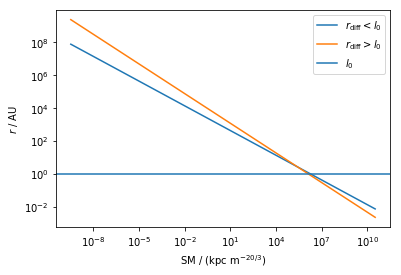

In [288]:
lambda_0 = 0.23 # m
#lambda_0 = 0.50 # m
l_0 = 1.496e11  # m  == 1 AU
kpc2m = 3.086e19 # m

SM_unit = 3.241e-8 # kpc m^-20/3 to 10^12 m^-17/3

## range of possible SM_eff 
SM_eff = 10.**np.linspace(10,30,100)/kpc2m ## kpc m^-20/3

#r_lo = ( 8e9 * lambda_0**-1 * (SM_unit*SM_eff)**-0.5 )**1.2 ## r < l_0, 
r_lo = 8e9 * lambda_0**-1 * (SM_unit*SM_eff)**-0.5  ## r < l_0, 
r_hi = 3.7e9 * lambda_0**-1.2 * (SM_unit*SM_eff)**-0.6      ## r > l_0

plt.loglog( SM_eff, r_lo/l_0, label=r"$r_{\rm diff} < l_0$" )
plt.plot( SM_eff, r_hi/l_0, label=r"$r_{\rm diff} > l_0$" )
plt.axhline(y=l_0/l_0, label=r"$l_0$")
plt.ylabel('$r$ / AU')
plt.xlabel('SM / (kpc m$^{-20/3}$)')
plt.legend()



For $\lambda = 0.23$ m, the $r_{diff}<l_0$ equations are valid, where the blue line is below $l_0 = 1$ AU.  The $r_{diff}>l_0$ equations are valid, where the orange line is above $l_0 = 1$ AU. Clearly, the latter is the case for all reasonable contributions to SM.